# Analiza głosowań w Sejmie

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Kod w tym notatniku jest ukryty dla wygodniejszego czytania. Jeżeli chcesz go zobaczyć naciśnij <a href="javascript:code_toggle()">tutaj</a>.''')

Tak wyglądają przykładowe dane z głosowania

In [6]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv("kad8\\glos1.csv")
df.head()

,﻿posel,glos_57_10,glos_11_9,glos_56_140,glos_32_117,glos_31_166,glos_24_5,glos_39_78,glos_39_46,glos_19_6,...,glos_5_33,glos_30_65,glos_10_333,glos_43_40,glos_23_87,glos_56_145,glos_39_40,glos_43_11,glos_54_20,glos_52_31
0,ABRAMOWICZ ADAM,ng.,pr.,pr.,za,pr.,za,za,pr.,pr.,...,pr.,pr.,ng.,pr.,za,pr.,za,pr.,pr.,za
1,ADAMCZYK ANDRZEJ,za,ng.,pr.,za,pr.,za,za,pr.,pr.,...,pr.,pr.,pr.,pr.,ng.,pr.,za,ng.,pr.,ng.
2,AJCHLER ZBIGNIEW,pr.,za,ng.,pr.,za,za,za,za,za,...,za,za,za,pr.,pr.,ng.,pr.,za,za,za
3,ANDRUSZKIEWICZ ADAM,za,ws.,pr.,pr.,pr.,ng.,za,za,ws.,...,pr.,ws.,za,pr.,za,pr.,za,za,ng.,za
4,ANDZEL WALDEMAR,za,pr.,pr.,za,pr.,za,za,pr.,pr.,...,pr.,pr.,pr.,pr.,za,pr.,za,pr.,pr.,za


In [52]:
## Zamiana głosów za i przeciw na 0 i 1 
def mapa (x):
    if x=="za":
        return 1
    elif x=="pr.":
        return 0
    elif x=="ng.":
        return np.nan
    elif x=="ws.":
        return 0
    else:
        return x
    
def mapa_row(x):
    return x.apply(mapa)
    
liczby= df.apply(mapa_row)
liczby = liczby.drop("glos_33_15", axis=1)

### Sprawdzenie ilości głosów za i przeciw w losowych głosowaniach (1 to głosy za a 0 i NULL to głosy przeciw/wstrzymanie  się/nieobecność)

In [160]:
liczby.drop("posel", axis=1).apply(np.nansum).sort_values(ascending=False).head(10)

glos_1_28    457.0
glos_1_23    457.0
glos_1_26    456.0
glos_4_6     456.0
glos_1_35    456.0
glos_1_37    455.0
glos_1_30    455.0
glos_1_38    455.0
glos_1_36    455.0
glos_1_20    455.0
dtype: float64

### Sprawdzenie godzin głosowania

In [7]:
daty= pd.read_csv("kad8\\dates.csv")
daty.date= pd.to_datetime(daty.date)

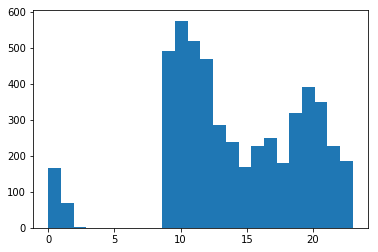

In [84]:
daty["godzina"] = pd.to_datetime(daty.time).dt.hour
plt.hist(daty.godzina, bins=24)
plt.show()

### Czyszczenie kolumny voting aby powstały 2 dodatkowe kolumny- nr posiedzenia i nr głosowania

In [138]:
a=[]
for i in daty['voting'].str.split('_'):
    a.append(i[1])
daty["posiedzenie"] = a
a=[]
for i in daty['voting'].str.split('_'):
    a.append(i[2])
daty["glosowanie"] = a
#daty = daty.drop(["a"], axis=1)
daty.glosowanie= pd.to_numeric(daty.glosowanie)
daty.godzina= pd.to_numeric(daty.godzina)
daty.posiedzenie = pd.to_numeric(daty.posiedzenie)
daty.head()

,voting,date,time,godzina,posiedzenie,glosowanie
0,glos_10_1,2016-01-28,20:17:10,20,10,1
1,glos_10_10,2016-01-28,20:52:02,20,10,10
2,glos_10_100,2016-01-29,00:32:27,0,10,100
3,glos_10_101,2016-01-29,00:34:53,0,10,101
4,glos_10_102,2016-01-29,00:36:48,0,10,102


### Sprawdzenie ile głosowań odbywa się na jednym posiedzeniu

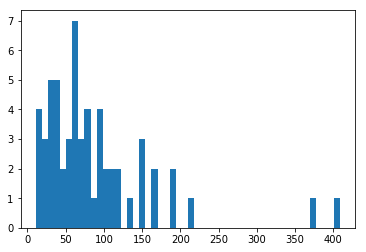

In [136]:
plt.close()
plt.hist(daty.groupby(["posiedzenie"]).size(), bins=50)
plt.show()

### Ile głosowań odbyło się w godzinach nocnych w ramach danego posiedzenia?

Mała ilość głosowań wskazuje na "przeciągnięcie się" posiedzenia, natomiast duża może świadczyć o celowym zaplanowaniu posiedzenia na godziny wieczorne

In [158]:
daty.query("godzina>22 or godzina<5").groupby("posiedzenie").size()

posiedzenie
1      10
2       7
10    239
18      3
32     56
43     24
46      1
54     16
55     69
dtype: int64